In [28]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import timeit
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

In [29]:
# LOAD DATA REAL SIMULATION

def load_data(main_path, num_directory, delta_times, num_point):
    
    # load and normalisasi data X
    data = []
    for i in range (1, num_directory+1):
        dataX = []
        for j in range (1, num_point+1):
            load_input = pd.read_csv("%s/%s/GAUSS_03_BP%s.txt" % (main_path, str(i), str(j)), header=None, sep='\s+')
            X_target = load_input[[0,1]]
            time = X_target[0]
            #print(time)
            X_target = X_target[1]
            d = {'data': X_target}
            df = pd.DataFrame(data=d).replace(np.nan, 0)
            df = df[:delta_times].values.T
            dataX.append(df)
        dataX = np.array(dataX).reshape(1, num_point,-1)
        data.append(dataX)
    data = np.array(data)
    X = []
    for i in range (num_directory):
        X.append(data[i].T)
    X = np.array(X).reshape(-1, delta_times, num_point)
    #print(X)
    
    
    # load and normalisasi data Y
    Y = []
    for i in range (1, num_directory+1):
        data_target = pd.read_csv("%s/%s/GAUSS_03_ETA.txt" % (main_path, str(i)), header=None, sep='\s+')
        #loc_target = pd.read_csv("%s/%s/GAUSS_03_ETA_Loc.txt" % (main_path, str(i)), header=None, sep='\s+')
        #print(loc_target)
        #122 rows x 714 columns
        data_target = data_target.replace(np.nan, 0)
        dataY = data_target.values
        Y_target = dataY[0]
        #print(Y_target)
        Y.append([Y_target])
    Y = np.array(Y).reshape(-1, 714)
    #print(Y)
        
    return X, Y
        
    

In [30]:
data_train = '../../08_RealCaseSimulation/newTrain'
data_test = '../../08_RealCaseSimulation/newTesting'
X_train, Y_train = load_data(data_train, 100, 80, 4)
#print(Y_train)
X_val, Y_val = load_data(data_test, 10, 80, 4)
#X_train.shape
#print(Y_val[9])

In [31]:
# MODEL ML

def model_RNN(X,Y):
    start = timeit.default_timer() #start time calculation

    #model LSTM
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.SimpleRNN(1536, activation='tanh', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(tf.keras.layers.SimpleRNN(896, activation='relu', return_sequences=False))
    model.add(tf.keras.layers.Dense(Y.shape[1]))

    #model learning rate using Adam optimization
    optimizer = tf.keras.optimizers.Adam(1e-3)

    #model loss calculation using mse
    model.compile(loss="mse", optimizer=optimizer)

    #model number of train 1000 epochs with batch size 32
    model.fit(X,Y, epochs=1000, shuffle=False, batch_size=32)

    stop = timeit.default_timer() #end time calculation

    time = stop - start #time calculation
    
    return model, time


def model_LSTM(X,Y):
    start = timeit.default_timer() #start time calculation

    #model LSTM
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(1536, activation= 'tanh', recurrent_activation='sigmoid', return_sequences=True, 
                                   input_shape=(X.shape[1],X.shape[2])))
    model.add(tf.keras.layers.LSTM(896, activation= 'tanh', recurrent_activation='sigmoid', return_sequences=False))
    model.add(tf.keras.layers.Dense(Y.shape[1]))

    #model learning rate using Adam optimization
    optimizer = tf.keras.optimizers.Adam(1e-3)

    #model loss calculation using mse
    model.compile(loss="mse", optimizer=optimizer)

    #model number of train 1000 epochs with batch size 32
    model.fit(X,Y, epochs=1000, shuffle=False, batch_size=32)

    stop = timeit.default_timer() #end time calculation

    time = stop - start #time calculation
    
    return model, time

In [18]:
# TRAINING DATA WITH MODEL RNN

model, time = model_RNN(X_train, Y_train)
print(time)

Epoch 1/1000
4/4 [==============================] - 6s 1s/step - loss: 2.0846
Epoch 2/1000
4/4 [==============================] - 6s 1s/step - loss: 7.2887
Epoch 3/1000
4/4 [==============================] - 6s 2s/step - loss: 1.9445
Epoch 4/1000
4/4 [==============================] - 6s 1s/step - loss: 2.5132
Epoch 5/1000
4/4 [==============================] - 6s 1s/step - loss: 1.9473
Epoch 6/1000
4/4 [==============================] - 6s 2s/step - loss: 1.4016
Epoch 7/1000
4/4 [==============================] - 6s 1s/step - loss: 1.1168
Epoch 8/1000
4/4 [==============================] - 5s 1s/step - loss: 1.0555
Epoch 9/1000
4/4 [==============================] - 6s 1s/step - loss: 1.0218
Epoch 10/1000
4/4 [==============================] - 5s 1s/step - loss: 1.0079
Epoch 11/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9863
Epoch 12/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9802
Epoch 13/1000
4/4 [==============================] - 6s 1s/st

4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 105/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 106/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 107/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 108/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9553
Epoch 109/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9553
Epoch 110/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9553
Epoch 111/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 112/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 113/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9556
Epoch 114/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9553
Epoch 115/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9554
Epoch 116/1000
4/4 [==============================] - 6

4/4 [==============================] - 5s 1s/step - loss: 0.9525
Epoch 207/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9523
Epoch 208/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9522
Epoch 209/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9522
Epoch 210/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9522
Epoch 211/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9522
Epoch 212/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9527
Epoch 213/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9526
Epoch 214/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9534
Epoch 215/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9552
Epoch 216/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9547
Epoch 217/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9539
Epoch 218/1000
4/4 [==============================] - 5

4/4 [==============================] - 5s 1s/step - loss: 0.9535
Epoch 309/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9535
Epoch 310/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9535
Epoch 311/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9535
Epoch 312/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9535
Epoch 313/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9535
Epoch 314/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9535
Epoch 315/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9534
Epoch 316/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9534
Epoch 317/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9534
Epoch 318/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9534
Epoch 319/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9534
Epoch 320/1000
4/4 [==============================] - 5

4/4 [==============================] - 5s 1s/step - loss: 0.9526
Epoch 411/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9526
Epoch 412/1000
4/4 [==============================] - 6s 2s/step - loss: 0.9526
Epoch 413/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9526
Epoch 414/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9526
Epoch 415/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9525
Epoch 416/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9525
Epoch 417/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9525
Epoch 418/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9525
Epoch 419/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9525
Epoch 420/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9525
Epoch 421/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9525
Epoch 422/1000
4/4 [==============================] - 5

4/4 [==============================] - 6s 1s/step - loss: 0.9453
Epoch 513/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9450
Epoch 514/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9445
Epoch 515/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9441
Epoch 516/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9438
Epoch 517/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9438
Epoch 518/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9440
Epoch 519/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9472
Epoch 520/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9462
Epoch 521/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9472
Epoch 522/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9479
Epoch 523/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9391
Epoch 524/1000
4/4 [==============================] - 5

4/4 [==============================] - 5s 1s/step - loss: 0.9368
Epoch 615/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9339
Epoch 616/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9296
Epoch 617/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9292
Epoch 618/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9281
Epoch 619/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9304
Epoch 620/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9191
Epoch 621/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9020
Epoch 622/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9166
Epoch 623/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9521
Epoch 624/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9767
Epoch 625/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9992
Epoch 626/1000
4/4 [==============================] - 5

4/4 [==============================] - 5s 1s/step - loss: 0.9462
Epoch 717/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9460
Epoch 718/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9458
Epoch 719/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9456
Epoch 720/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9455
Epoch 721/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9454
Epoch 722/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9452
Epoch 723/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9451
Epoch 724/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9450
Epoch 725/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9449
Epoch 726/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9447
Epoch 727/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9446
Epoch 728/1000
4/4 [==============================] - 5

4/4 [==============================] - 5s 1s/step - loss: 0.9443
Epoch 819/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9417
Epoch 820/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9431
Epoch 821/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9403
Epoch 822/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9415
Epoch 823/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9369
Epoch 824/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9383
Epoch 825/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9351
Epoch 826/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9344
Epoch 827/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9190
Epoch 828/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9131
Epoch 829/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9007
Epoch 830/1000
4/4 [==============================] - 5

4/4 [==============================] - 5s 1s/step - loss: 0.9540
Epoch 921/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9540
Epoch 922/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9540
Epoch 923/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9540
Epoch 924/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9540
Epoch 925/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9540
Epoch 926/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9539
Epoch 927/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9539
Epoch 928/1000
4/4 [==============================] - 6s 1s/step - loss: 0.9539
Epoch 929/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9539
Epoch 930/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9539
Epoch 931/1000
4/4 [==============================] - 5s 1s/step - loss: 0.9539
Epoch 932/1000
4/4 [==============================] - 5

In [19]:
model.save('Model Tsunami RNN.h5')
model.save_weights('Model Tsunami RNN Weight.h5')

In [20]:
# PREDICTION USING MODEL RNN

Y_predict = model.predict(X_val)

In [21]:
# CHECK ERROR PREDICTION


for i in range(10):
    
    print("\t\t Condition Scenario-%s" % (str(i+1)))
    print("MAE value is ",mean_absolute_error(Y_val[i], Y_predict[i]))
    print("RMSE value is ",mean_squared_error(Y_val[i], Y_predict[i], squared=False))

    corr, _ = pearsonr(Y_predict[i], Y_val[i])

    print("Correlation Coefficient value is ",corr)
    print("=============================================================\n")

		 Condition Scenario-1
MAE value is  0.5117571949236781
RMSE value is  1.3417287903898996
Correlation Coefficient value is  0.8406161355330082

		 Condition Scenario-2
MAE value is  0.5108886612135428
RMSE value is  1.4135075008678288
Correlation Coefficient value is  0.8574605876778449

		 Condition Scenario-3
MAE value is  0.3063065757640893
RMSE value is  0.8250763833477844
Correlation Coefficient value is  0.7653905005782112

		 Condition Scenario-4
MAE value is  0.3857932547790923
RMSE value is  1.027315894480789
Correlation Coefficient value is  0.2695232147864637

		 Condition Scenario-5
MAE value is  0.3335247330116402
RMSE value is  0.8658883521195136
Correlation Coefficient value is  0.5599928135379509

		 Condition Scenario-6
MAE value is  0.3378455445673622
RMSE value is  0.8389689276969189
Correlation Coefficient value is  0.6683050590268931

		 Condition Scenario-7
MAE value is  0.3234018890767139
RMSE value is  0.8541400891301049
Correlation Coefficient value is  0.6185

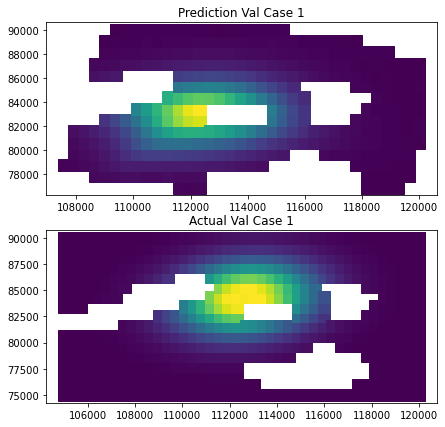

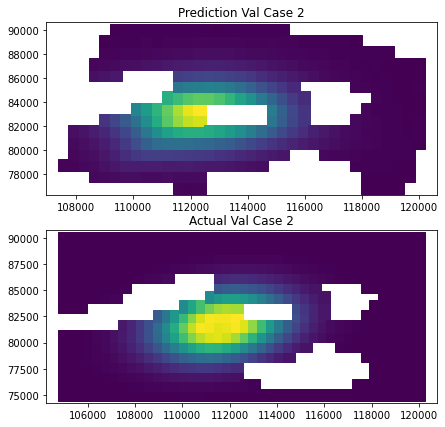

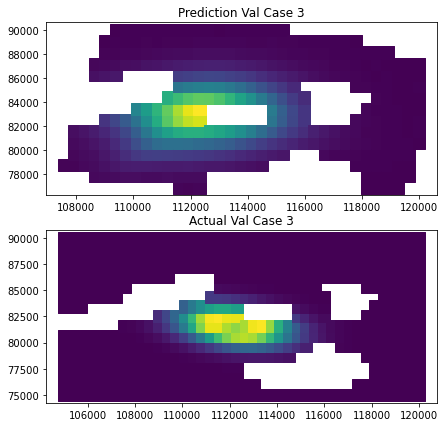

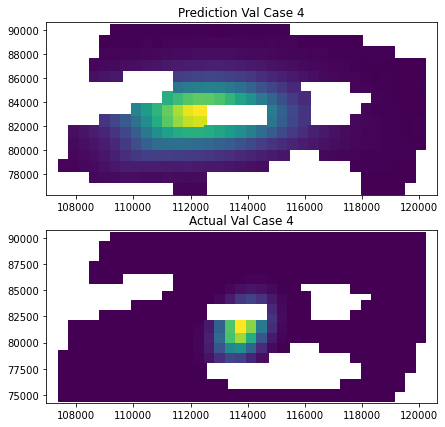

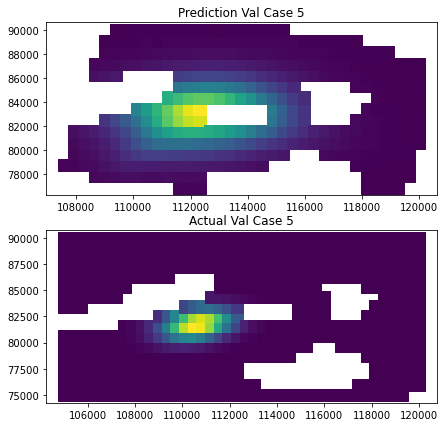

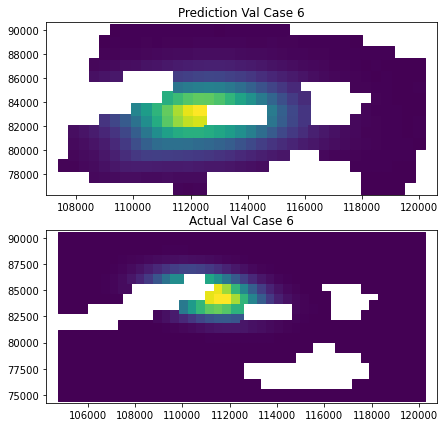

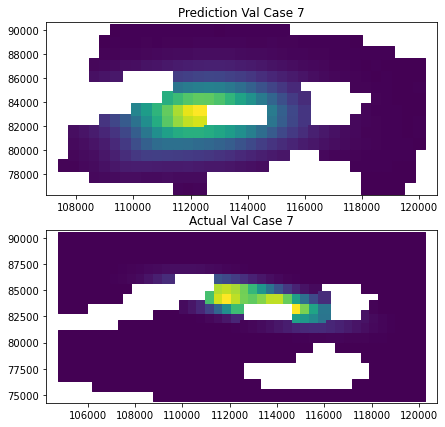

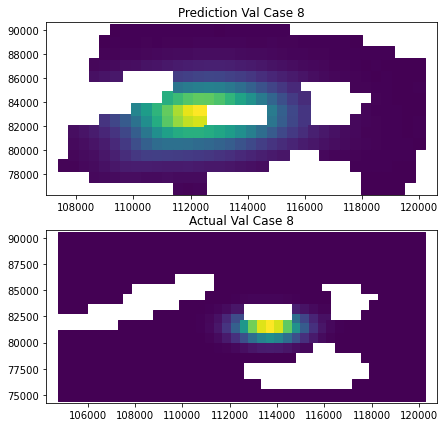

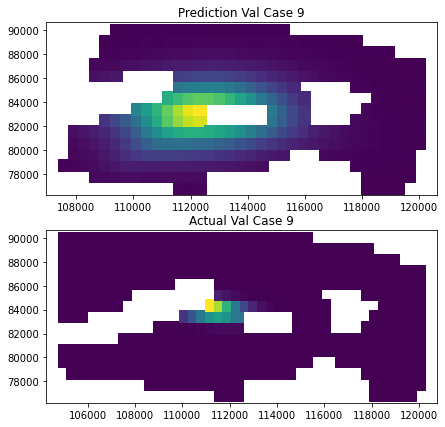

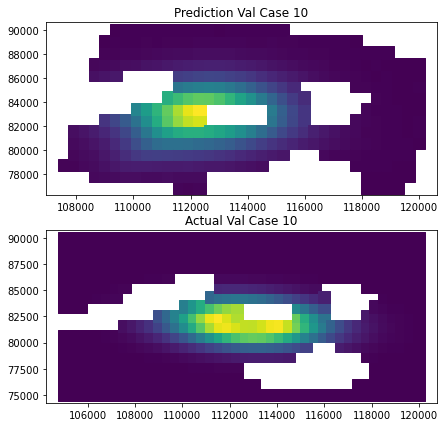

In [22]:
# PLOT PREDICTION AND ACTUAL CASE

loc_target = pd.read_csv('../../08_RealCaseSimulation/DataTest/1/GAUSS_03_ETA_Loc.txt', header=None, sep='\s+')

zreal = Y_val
zpred = Y_predict

zreal[zreal == 0] = np.nan

masking = np.argwhere(np.isnan(zreal))

for k in range(10):
    for i in range(len(masking)):
        zpred[k][masking[i]] = np.nan

for i in range(10):
    point_test = i
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(7,7))
    ax1.scatter(loc_target[0],loc_target[1], 150, zpred[point_test], marker='s')
    ax1.set_title('Prediction Val Case '+str(point_test+1))

    ax2.scatter(loc_target[0],loc_target[1], 150, zreal[point_test], marker='s')
    ax2.set_title('Actual Val Case '+str(point_test+1))

In [32]:
# TRAINING DATA USING MODEL LSTM

model, time = model_LSTM(X_train, Y_train)
print(time)

Epoch 1/1000
4/4 [==============================] - 26s 6s/step - loss: 1.8218
Epoch 2/1000
4/4 [==============================] - 26s 6s/step - loss: 1.0443
Epoch 3/1000
4/4 [==============================] - 26s 6s/step - loss: 1.0205
Epoch 4/1000
4/4 [==============================] - 26s 6s/step - loss: 0.9831
Epoch 5/1000
4/4 [==============================] - 26s 6s/step - loss: 0.9690
Epoch 6/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9605
Epoch 7/1000
4/4 [==============================] - 26s 6s/step - loss: 0.9574
Epoch 8/1000
4/4 [==============================] - 26s 7s/step - loss: 0.9569
Epoch 9/1000
4/4 [==============================] - 26s 6s/step - loss: 0.9563
Epoch 10/1000
4/4 [==============================] - 26s 7s/step - loss: 0.9558
Epoch 11/1000
4/4 [==============================] - 26s 6s/step - loss: 0.9552
Epoch 12/1000
4/4 [==============================] - 26s 6s/step - loss: 0.9541
Epoch 13/1000
4/4 [==============================

4/4 [==============================] - 27s 7s/step - loss: 0.9519
Epoch 104/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9519
Epoch 105/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9517
Epoch 106/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9516
Epoch 107/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9515
Epoch 108/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9515
Epoch 109/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9514
Epoch 110/1000
4/4 [==============================] - 28s 7s/step - loss: 0.9513
Epoch 111/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9512
Epoch 112/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9510
Epoch 113/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9509
Epoch 114/1000
4/4 [==============================] - 27s 7s/step - loss: 0.9507
Epoch 115/1000
4/4 [=======================

4/4 [==============================] - 27s 7s/step - loss: 0.3453
Epoch 205/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3471
Epoch 206/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3453
Epoch 207/1000
4/4 [==============================] - 40s 10s/step - loss: 0.3312
Epoch 208/1000
4/4 [==============================] - 31s 8s/step - loss: 0.3442
Epoch 209/1000
4/4 [==============================] - 28s 7s/step - loss: 0.3965
Epoch 210/1000
4/4 [==============================] - 26s 7s/step - loss: 0.3782
Epoch 211/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3692
Epoch 212/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3992
Epoch 213/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3685
Epoch 214/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3680
Epoch 215/1000
4/4 [==============================] - 27s 7s/step - loss: 0.3442
Epoch 216/1000
4/4 [======================

4/4 [==============================] - 27s 7s/step - loss: 0.1890
Epoch 306/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1859
Epoch 307/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1852
Epoch 308/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1833
Epoch 309/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1826
Epoch 310/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1826
Epoch 311/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1798
Epoch 312/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1804
Epoch 313/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1777
Epoch 314/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1798
Epoch 315/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1790
Epoch 316/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1824
Epoch 317/1000
4/4 [=======================

4/4 [==============================] - 27s 7s/step - loss: 0.1075
Epoch 407/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1063
Epoch 408/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1066
Epoch 409/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1053
Epoch 410/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1058
Epoch 411/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1050
Epoch 412/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1059
Epoch 413/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1045
Epoch 414/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1050
Epoch 415/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1046
Epoch 416/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1046
Epoch 417/1000
4/4 [==============================] - 27s 7s/step - loss: 0.1058
Epoch 418/1000
4/4 [=======================

4/4 [==============================] - 27s 7s/step - loss: 0.0660
Epoch 508/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0680
Epoch 509/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0657
Epoch 510/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0704
Epoch 511/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0713
Epoch 512/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0691
Epoch 513/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0769
Epoch 514/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0711
Epoch 515/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0821
Epoch 516/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0750
Epoch 517/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0999
Epoch 518/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0879
Epoch 519/1000
4/4 [=======================

4/4 [==============================] - 28s 7s/step - loss: 0.0427
Epoch 609/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0421
Epoch 610/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0410
Epoch 611/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0408
Epoch 612/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0382
Epoch 613/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0372
Epoch 614/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0365
Epoch 615/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0374
Epoch 616/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0359
Epoch 617/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0358
Epoch 618/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0350
Epoch 619/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0344
Epoch 620/1000
4/4 [=======================

4/4 [==============================] - 28s 7s/step - loss: 0.0580
Epoch 710/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0521
Epoch 711/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0563
Epoch 712/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0643
Epoch 713/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0556
Epoch 714/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0541
Epoch 715/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0508
Epoch 716/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0447
Epoch 717/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0470
Epoch 718/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0479
Epoch 719/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0355
Epoch 720/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0316
Epoch 721/1000
4/4 [=======================

4/4 [==============================] - 28s 7s/step - loss: 0.0108
Epoch 811/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0106
Epoch 812/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0104
Epoch 813/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0104
Epoch 814/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0103
Epoch 815/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0104
Epoch 816/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0103
Epoch 817/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0106
Epoch 818/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0106
Epoch 819/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0111
Epoch 820/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0110
Epoch 821/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0118
Epoch 822/1000
4/4 [=======================

4/4 [==============================] - 27s 7s/step - loss: 0.0085
Epoch 912/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0083
Epoch 913/1000
4/4 [==============================] - 26s 7s/step - loss: 0.0083
Epoch 914/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0082
Epoch 915/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0082
Epoch 916/1000
4/4 [==============================] - 26s 7s/step - loss: 0.0077
Epoch 917/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0072
Epoch 918/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0067
Epoch 919/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0063
Epoch 920/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0060
Epoch 921/1000
4/4 [==============================] - 28s 7s/step - loss: 0.0059
Epoch 922/1000
4/4 [==============================] - 27s 7s/step - loss: 0.0058
Epoch 923/1000
4/4 [=======================

In [33]:
model.save('Model Tsunami LSTM.h5')
model.save_weights('Model Tsunami LSTM Weight.h5')

In [34]:
# PREDICTION USING MODEL LSTM

Y_predict = model.predict(X_val)

In [35]:
# CHECK ERROR PREDICTION


for i in range(10):
    
    print("\t\t Condition Scenario-%s" % (str(i+1)))
    print("MAE value is ",mean_absolute_error(Y_val[i], Y_predict[i]))
    print("RMSE value is ",mean_squared_error(Y_val[i], Y_predict[i], squared=False))

    corr, _ = pearsonr(Y_predict[i], Y_val[i])

    print("Correlation Coefficient value is ",corr)
    print("=============================================================\n")

		 Condition Scenario-1
MAE value is  0.20720841495929285
RMSE value is  0.36616324389539656
Correlation Coefficient value is  0.9854433055075988

		 Condition Scenario-2
MAE value is  0.11301375780743363
RMSE value is  0.22043165434083203
Correlation Coefficient value is  0.9948130690930577

		 Condition Scenario-3
MAE value is  0.24928732742156612
RMSE value is  0.7330045332657991
Correlation Coefficient value is  0.8429212927357745

		 Condition Scenario-4
MAE value is  0.1886386577907595
RMSE value is  0.5637517495306388
Correlation Coefficient value is  0.5867821510843705

		 Condition Scenario-5
MAE value is  0.11303465920935525
RMSE value is  0.3756792745498447
Correlation Coefficient value is  0.9213555676856495

		 Condition Scenario-6
MAE value is  0.18030473573324154
RMSE value is  0.5246983012800307
Correlation Coefficient value is  0.8789526063042082

		 Condition Scenario-7
MAE value is  0.20870636792334454
RMSE value is  0.48714438897479
Correlation Coefficient value is 

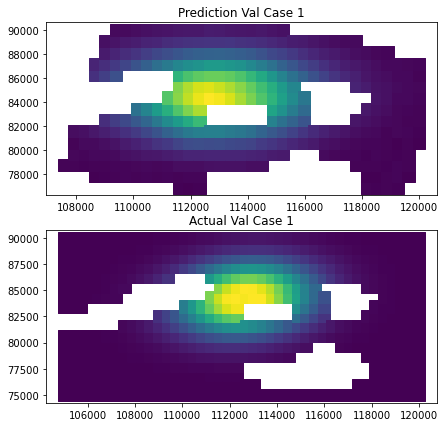

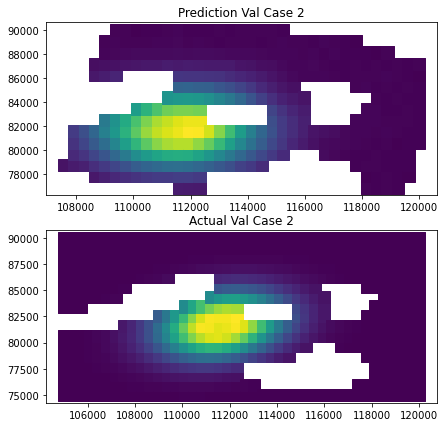

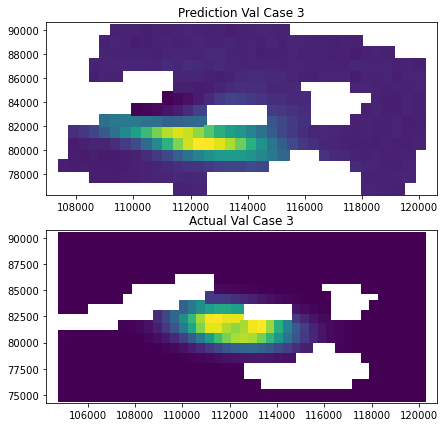

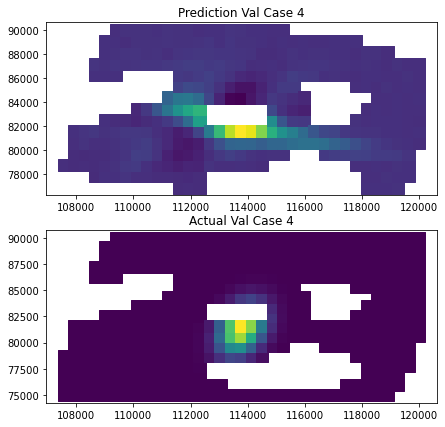

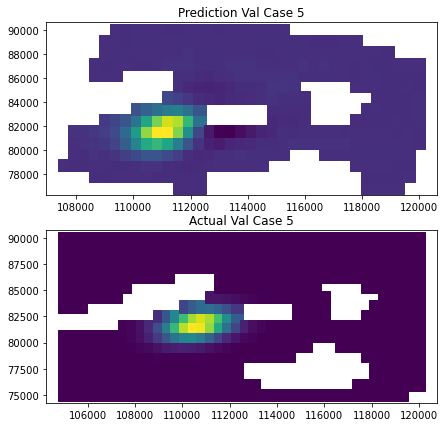

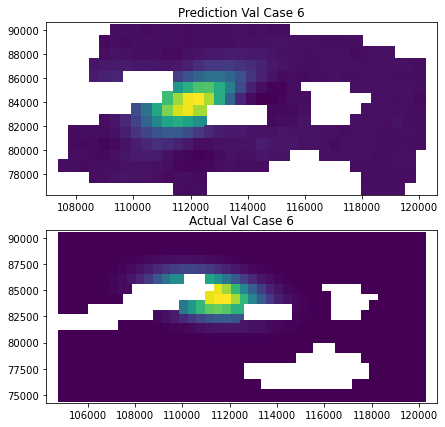

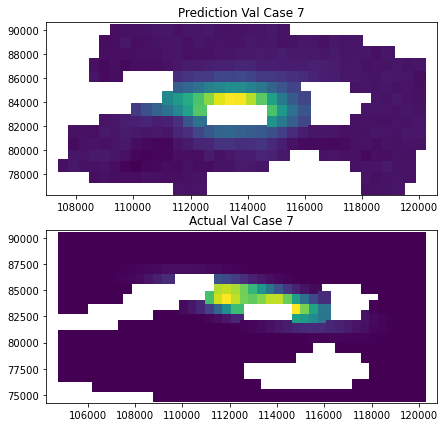

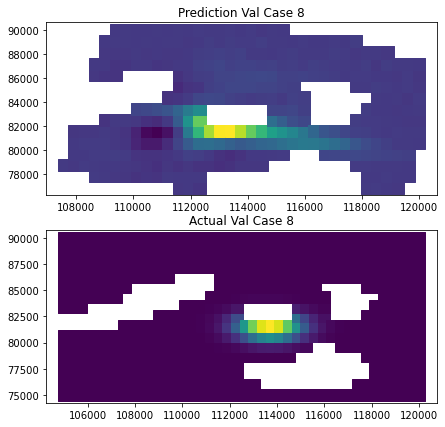

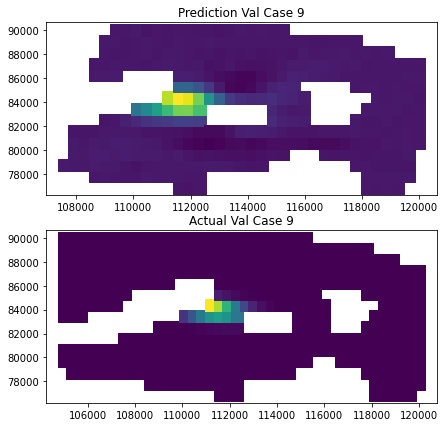

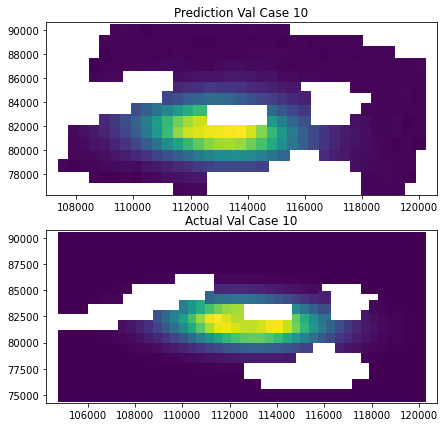

In [36]:
# PLOT PREDICTION AND ACTUAL CASE

loc_target = pd.read_csv('../../08_RealCaseSimulation/newTrain/1/GAUSS_03_ETA_Loc.txt', header=None, sep='\s+')

zreal = Y_val
zpred = Y_predict

zreal[zreal == 0] = np.nan

masking = np.argwhere(np.isnan(zreal))

for k in range(10):
    for i in range(len(masking)):
        zpred[k][masking[i]] = np.nan

for i in range(10):
    point_test = i
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(7,7))
    ax1.scatter(loc_target[0],loc_target[1], 150, zpred[point_test], marker='s')
    ax1.set_title('Prediction Val Case '+str(point_test+1))


    ax2.scatter(loc_target[0],loc_target[1], 150, zreal[point_test], marker='s')
    ax2.set_title('Actual Val Case '+str(point_test+1))